# Building an Enhanced Credit Scoring Model for Informed Financial Decisions

In the dynamic landscape of market economies, the pivotal role of banks in extending credit and influencing investment decisions cannot be overstated. The availability of credit to individuals and businesses is a critical factor in sustaining economic growth and ensuring the smooth functioning of societies.

In this project, our primary aim is to develop a sophisticated model that empowers borrowers to make well-informed financial choices. Leveraging a comprehensive historical dataset encompassing the financial profiles of 250,000 borrowers, we are set to revolutionize credit scoring algorithms. These algorithms are pivotal for banks to assess the likelihood of default and make crucial determinations about granting loans.

Our project seeks to elevate the existing standard of credit scoring by predicting the probability of individuals facing financial distress over a two-year horizon. By harnessing advanced predictive techniques, we aim to create a model that can anticipate the potential for financial hardship, thereby assisting both borrowers and lenders in making informed decisions.

Through this endeavor, we aspire to enhance the accuracy and reliability of credit assessments, offering borrowers an indispensable tool for gauging their financial well-being. By improving credit scoring methodologies, we contribute to the stability of market systems and empower individuals and enterprises with access to the credit they need to drive growth and prosperity.



## Importing the Neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

%matplotlib inline

## Reading in the data

In [2]:
# Train Data

df1 = pd.read_csv('cs-training.csv')
print('Shape of Train data: ', df1.shape)
df1.head()


Shape of Train data:  (150000, 12)


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


Our train data has 150,000 samples and 12 features including the target variable(what we're trying to predict). Though, unuseful columns like '	Unnamed: 0' will be dropped, so our train data will contain 10 independent variables(features) and our dependent variable(target).



In [3]:
##dropping the 'Unnamed: 0' column in train data

df1.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
# Test Data

test_df =  pd.read_csv('cs-test.csv')
print('Shape of Test data: ', test_df.shape)
test_df.head()

Shape of Test data:  (101503, 12)


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


Our test data contains 101,503 samples and 12 variables of which some are not needed, like 'Unnamed: 0' and we'll also be dropping 'SeriousDlqin2yrs' which is what we are trying to predict.

In [5]:
## dropping the 'Unnamed: 0' and 'SeriousDlqin2yrs' columns in our test data

test_df.drop(['Unnamed: 0', 'SeriousDlqin2yrs'], axis=1, inplace=True)

## Exploratory Data Analysis

--- 
**Reading in a data that contains the description and datatype of each variable(features and target) in our train and test datasets**

In [6]:
var_description = pd.read_excel('Data Dictionary.xls', names=['Variable Name', 'Description', 'Type'])
var_description.drop(0, axis=0, inplace=True)
var_description

,Variable Name,Description,Type
1,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
2,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
3,age,Age of borrower in years,integer
4,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
5,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
6,MonthlyIncome,Monthly income,real
7,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
8,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
9,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer
10,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days p...,integer


In [7]:
for row in var_description['Description']:
    print(row)  

Person experienced 90 days past due delinquency or worse 
Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
Age of borrower in years
Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
Monthly debt payments, alimony,living costs divided by monthy gross income
Monthly income
Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
Number of times borrower has been 90 days or more past due.
Number of mortgage and real estate loans including home equity lines of credit
Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
Number of dependents in family excluding themselves (spouse, children etc.)


---

## Descriptive Stats of Our Datasets

In [8]:
df1.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [9]:
test_df.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [11]:
df1.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [12]:
test_df.isna().sum()

RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           20103
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2626
dtype: int64

We only have 2 columns with missing values in our train dataset. However, we will inspect each column to check for inputation or data collection errors while we also treat the ones with  issing values.

---
## Error & Null values handling


### 1. SeriousDlqin2yrs

In [13]:
df1['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

<Axes: xlabel='SeriousDlqin2yrs', ylabel='count'>

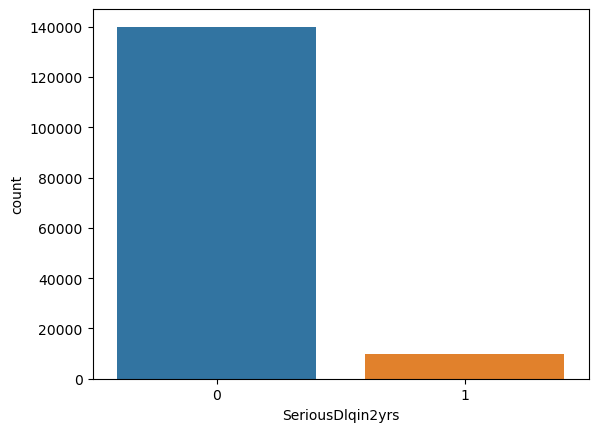

In [14]:
sns.countplot(data=df1, x='SeriousDlqin2yrs')

The distribution of the target variable provides valuable insight into the nature of our project. With approximately 139,974 instances categorized as "0" and 10,026 instances labeled as "1," we can observe a clear class imbalance.

The "0" class likely represents borrowers who have not experienced financial distress within the specified time frame, while the "1" class represents those who have encountered financial difficulties. This minority class could be individuals or entities facing challenges that may impact their ability to meet financial obligations.

---

### 2. RevolvingUtilizationOfUnsecuredLines

The "RevolvingUtilizationOfUnsecuredLines" can be calculated as the total balance on credit cards and personal lines of credit (excluding real estate loans) divided by the sum of credit limits. It represents the proportion of the credit that is currently being utilized by the individual. By dividing the total utilized credit by the total available credit, you get a percentage that indicates how much of the individual's credit is currently in use.



In [15]:
df2 = df1.copy()

In [16]:
df2['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

Since 'RevolvingUtilizationOfUnsecuredLines' of each sample was calculated in percentage(0-1 i.e; 0% - 100%), samples that have 'RevolvingUtilizationOfUnsecuredLines' less tha 0 or greater than 1 will be dropped because it's obviously an inputation error.

In [17]:
def drop_invalid_revolving_utilization(df):
    # Filter out rows where 'RevolvingUtilizationOfUnsecuredLines' is > 1 or < 0
    df.drop(df[(df['RevolvingUtilizationOfUnsecuredLines'] < 0) | (df['RevolvingUtilizationOfUnsecuredLines'] > 1)].index, inplace=True)

## Implementing the function on our train dataset and assigning to a new variable and test datasets
drop_invalid_revolving_utilization(df2)
drop_invalid_revolving_utilization(test_df)

---
### 3. Age

In [18]:
df3 = df2.copy()

In [19]:
df3['age'].describe()

count    146679.000000
mean         52.481766
std          14.763178
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

We will drop row that has 'age' as 0, it's obviously an inputational error because someone of 0 year old hasn't even been given birth to yet.

In [20]:
## Dropping rows with 'age' value of 0
df3.drop(df3[df3['age'] == 0].index, inplace=True)
test_df.drop(test_df[test_df['age'] == 0].index, inplace=True)

---
### 4. NumberOfTime30-59DaysPastDueNotWorse

In [21]:
df4 = df3.copy()

In [22]:
df4['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

0     124408
1      15192
2       4156
3       1530
4        638
5        287
98       264
6        114
7         43
8         23
9         11
96         5
10         3
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

This feature represents the number of times a borrower has been between 30 and 59 days past due on their payments and majority are under 10, samples with values bigger than 10 are probably anomalies and will be dropped

In [23]:
##dropping rows where 'NumberOfTime30-59DaysPastDueNotWorse' > 10
df4 = df4[df4['NumberOfTime30-59DaysPastDueNotWorse']<= 10]
test_df = test_df[test_df['NumberOfTime30-59DaysPastDueNotWorse']<= 10]

---
### 5. DebtRatio

In [24]:
df5 = df4.copy()

In [25]:
df5['DebtRatio'].describe()

count    146405.000000
mean        356.101277
std        2057.703626
min           0.000000
25%           0.175910
50%           0.366998
75%           0.871880
max      329664.000000
Name: DebtRatio, dtype: float64

The "DebtRatio" column represents the ratio of a borrower's monthly debt payments to their monthly gross income. This financial metric provides insights into an individual's or entity's financial health by evaluating their debt obligations relative to their income. It is calculated in percentage which means the values are to range between '0-1' though we have values greater than 1 in our dataset, we'll cap them to a maximum threshold which is '1'.

In [26]:
## capping 'DebtRatio' greater than 1 to maximum value '1'
df5['DebtRatio'] = df5['DebtRatio'].apply(lambda x: min(x, 1))
test_df['DebtRatio'] = test_df['DebtRatio'].apply(lambda x: min(x, 1))

---
### 6. MonthlyIncome

In [27]:
df6 = df5.copy()

In [28]:
df6['MonthlyIncome'].describe()

count    1.173430e+05
mean     6.708026e+03
std      1.453885e+04
min      0.000000e+00
25%      3.423000e+03
50%      5.416000e+03
75%      8.300000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [29]:
##dropped rows where MonthlyIncome = '0'
df6 = df6[df6['MonthlyIncome'] != 0]
test_df = test_df[test_df['MonthlyIncome'] != 0]

In [30]:
df6['MonthlyIncome'].isna().sum()

29062

We have over 29,000 samples with missing values in the 'MonthlyIncome' column, we will fill those missing values the median 'MonthlyIncome'.

In [31]:
## fill 'MonthlyIncome' null values with median
def fill_MI_missing_values(df):
    median_value = df['MonthlyIncome'].median()
    df['MonthlyIncome'].fillna(median_value, inplace=True)
    
fill_MI_missing_values(df6)
fill_MI_missing_values(test_df)

---
### 7. NumberOfOpenCreditLinesAndLoans

In [32]:
df7 = df6.copy()

In [33]:
df7['NumberOfOpenCreditLinesAndLoans'].describe()

count    144802.000000
mean          8.530573
std           5.151699
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

---
### 8. NumberOfTimes90DaysLate

In [34]:
df8 = df7.copy()

In [35]:
df8['NumberOfTimes90DaysLate'].describe()

count    144802.000000
mean          0.078252
std           0.440712
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          17.000000
Name: NumberOfTimes90DaysLate, dtype: float64

---
### 9. NumberRealEstateLoansOrLines

In [36]:
df9 = df8.copy()

In [37]:
df9['NumberRealEstateLoansOrLines'].describe()

count    144802.000000
mean          1.031118
std           1.133891
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

---
### 10. NumberOfTime60-89DaysPastDueNotWorse

In [38]:
df10 = df9.copy()

In [39]:
df10['NumberOfTime60-89DaysPastDueNotWorse'].describe()

count    144802.000000
mean          0.056643
std           0.302674
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          11.000000
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: float64

---
### 11. NumberOfDependents

In [40]:
df11 = df10.copy()

In [41]:
df11['NumberOfDependents'].value_counts()

0.0     83947
1.0     25483
2.0     18760
3.0      9101
4.0      2735
5.0       708
6.0       154
7.0        48
8.0        23
9.0         5
10.0        4
20.0        1
13.0        1
Name: NumberOfDependents, dtype: int64

In [42]:
df11['NumberOfDependents'].isna().sum()

3832

We will drop samples that have missing values in the 'NumberOfDependents' column and also drop rows with 'NumberOfDependents' higher than 8 because they are very few in number compared to others.

In [43]:
## ddropping the null values
df11 = df11.dropna(subset=['NumberOfDependents'])
test_df = test_df.dropna(subset=['NumberOfDependents'])

In [44]:
df11 = df11[df11['NumberOfDependents'] <= 8]
test_df = test_df[test_df['NumberOfDependents'] <= 8]

# Data Visualization

---
### Distribution Of Age

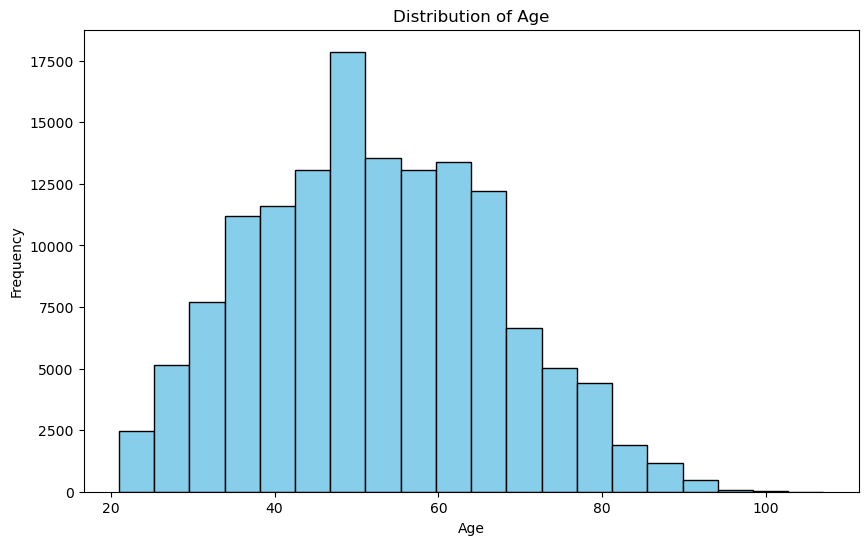

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(df11['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


The histogram showcases a relatively uniform distribution of ages, with the highest frequency observed between 30 and 70 years. This suggests that the dataset comprises a diverse range of borrowers in terms of age, contributing to a comprehensive representation.

---
### Age vs DebtRatio

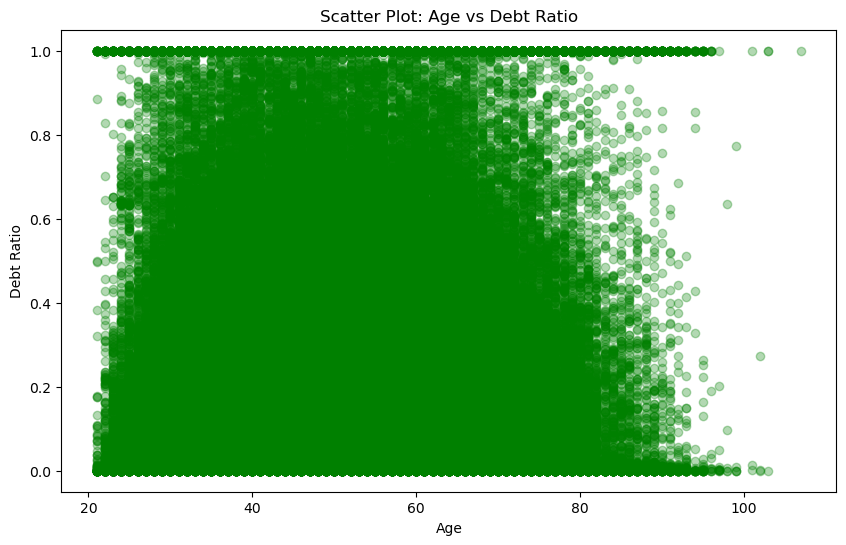

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(df11['age'], df11['DebtRatio'], alpha=0.3, color='green')
plt.xlabel('Age')
plt.ylabel('Debt Ratio')
plt.title('Scatter Plot: Age vs Debt Ratio')
plt.show()


The scatter plot between age and debt ratio showcases a scattered pattern with no discernible linear relationship. This suggests that age alone might not significantly influence a borrower's debt ratio. Borrowers of various ages exhibit diverse debt ratios, implying that age isn't the sole determinant of this financial metric.

---

### Distribution of Number of Dependents

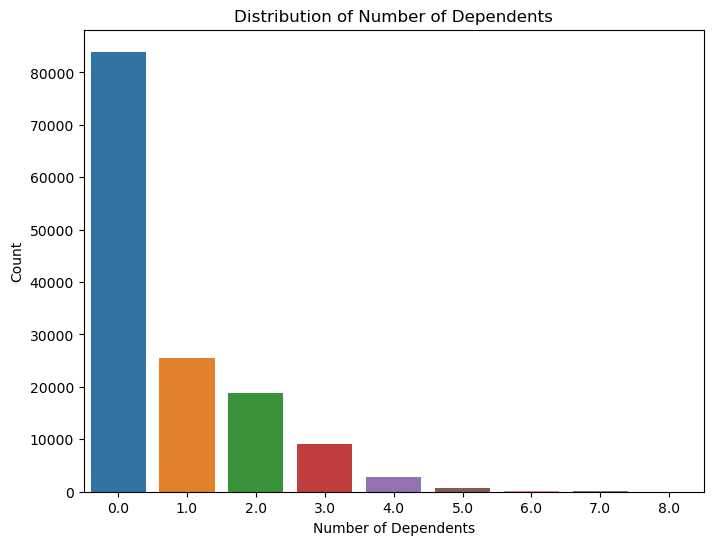

In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(x='NumberOfDependents', data=df11)
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.title('Distribution of Number of Dependents')
plt.show()


The bar plot illustrates the distribution of the number of dependents for borrowers. It's evident that most borrowers have a smaller number of dependents, while the count decreases for larger numbers. This conforms to common expectations, where individuals typically have fewer dependents.

### Loan Default Rate by Number of Dependents

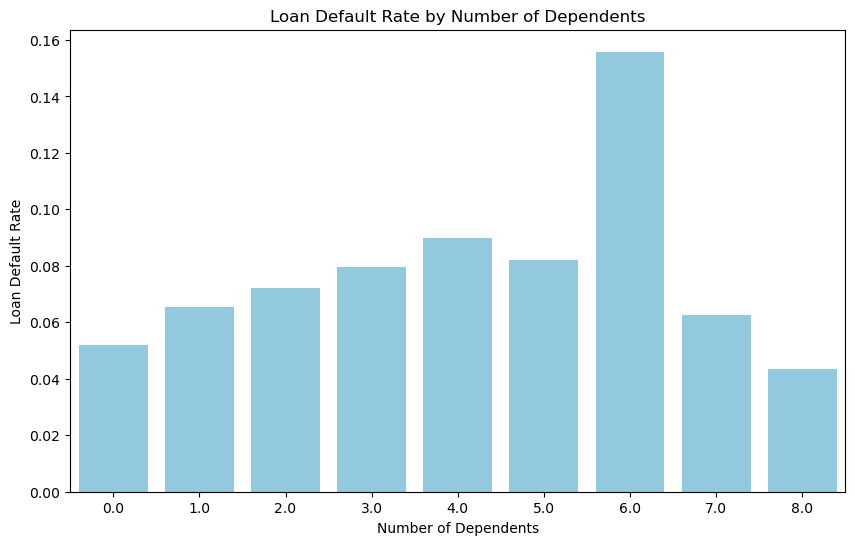

In [48]:
##function to get the mean of defaulters
def default_rate_by_dependents(data):
    return data['SeriousDlqin2yrs'].mean()

## applying the function here
default_rates = df11.groupby('NumberOfDependents').apply(default_rate_by_dependents)

plt.figure(figsize=(10, 6))
sns.barplot(x=default_rates.index, y=default_rates.values, color='skyblue')
plt.xlabel('Number of Dependents')
plt.ylabel('Loan Default Rate')
plt.title('Loan Default Rate by Number of Dependents')
plt.show()


 The bar plot illustrates the loan default rate across different numbers of dependents. Each bar represents the proportion of individuals who experienced serious delinquency (loan default) within a specific number of dependents. The plot helps us understand how the loan default rate varies based on the number of dependents.
 
 ---

### Correlation matrix

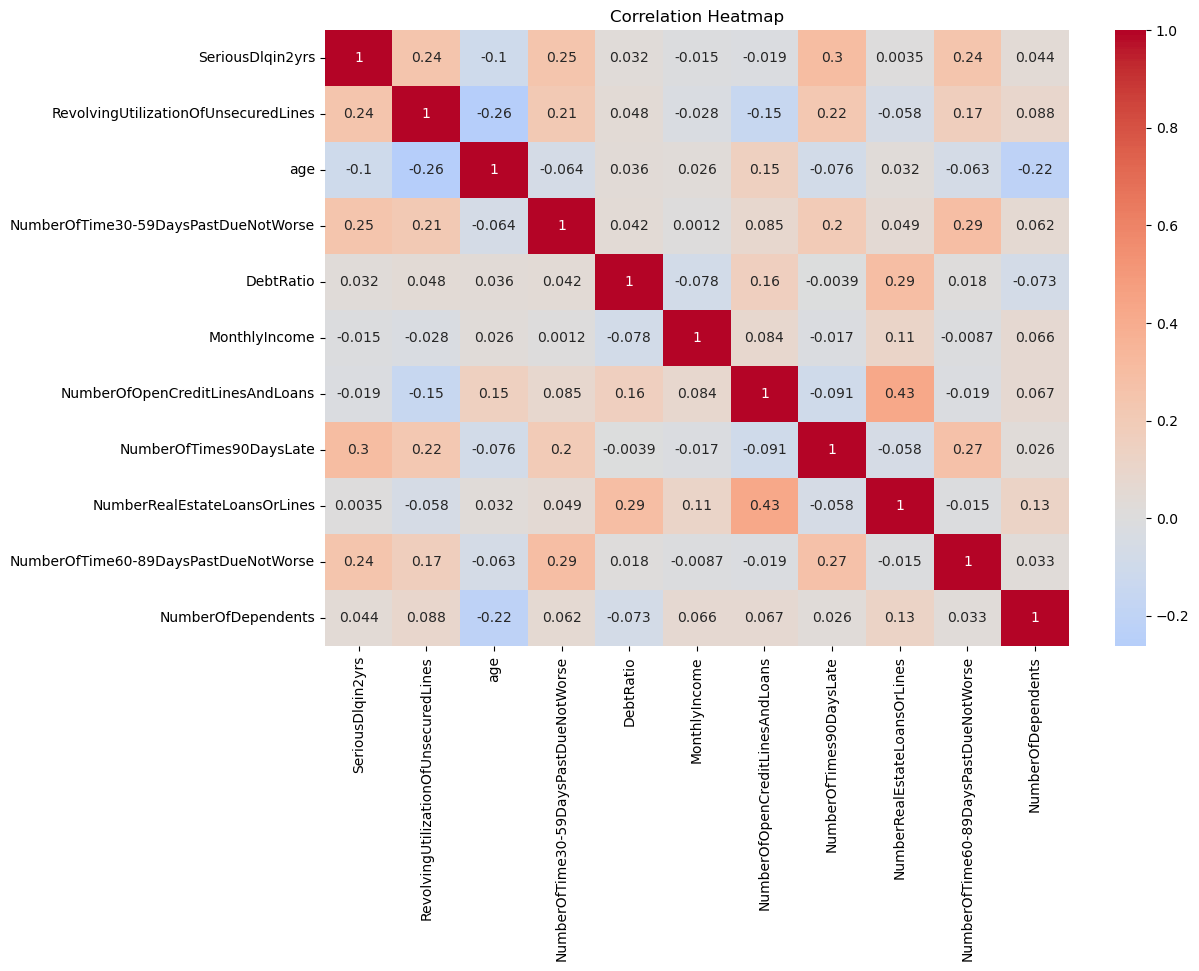

In [49]:
plt.figure(figsize=(12, 8))
sns.heatmap(df11.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


The 3 most correlated features to our target are;

- NumberOfTimes90DaysLate
- NumberOfTime30-59DaysPastDueNotWorse	
- RevolvingUtilizationOfUnsecuredLines & NumberOfTime60-89DaysPastDueNotWorse (they have same correlation with the target)

## Feature Engineering

In [50]:
df11['Family_size'] = df11['NumberOfDependents'] + 1 ## + 1 means including the person
test_df['Family_size'] = test_df['NumberOfDependents'] + 1 

## Model Training

In [51]:
train_df = df11.copy()

Now, let's check the ratio of our positve class to negative class, if there's a significant imbalance, we'll make use of 'SMOTE' to over-sample our dataset.

In [52]:
# Calculate the count of positive (1) and negative (0) classes
positive_count = len(train_df[train_df['SeriousDlqin2yrs'] == 1])
negative_count = len(train_df[train_df['SeriousDlqin2yrs'] == 0])

# Calculate the ratio
class_ratio_before_over_samp = positive_count / negative_count
class_ratio_before_over_samp

0.06366490092211105

There is a significant class imbalance.

---

We are using SMOTE (Synthetic Minority Over-sampling Technique) to address the class imbalance in our target variable. Class imbalance occurs when one class has significantly fewer samples than the other, which can lead to biased model predictions and reduced performance, especially for the minority class. SMOTE helps us overcome this imbalance by generating synthetic samples for the minority class, effectively increasing its representation in the dataset. This results in a more balanced dataset, allowing our model to learn the patterns of both classes more effectively and improving its ability to generalize to new data. By using SMOTE, we aim to enhance the model's performance in correctly predicting instances of the minority class, thereby improving the overall effectiveness of our credit scoring algorithm.


In [53]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df11.drop(columns=['SeriousDlqin2yrs'])
y = df11['SeriousDlqin2yrs']

# Initialize SMOTE
smote = SMOTE(random_state=0)

# Resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)


Now that we have used SMOTE to over-sample our data, let's check the ratio again to be sure that we are using it correctly.

In [54]:
# Calculate the count of positive (1) and negative (0) classes
positive_count = len(df_resampled[df_resampled['SeriousDlqin2yrs'] == 1])
negative_count = len(df_resampled[df_resampled['SeriousDlqin2yrs'] == 0])

# Calculate the ratio
class_ratio_after_over_samp = positive_count / negative_count
class_ratio_after_over_samp

1.0

After applying resampling techniques like SMOTE to address the class imbalance in our credit score prediction project, we've successfully achieved a balanced ratio of 1.0 between the positive (default) and negative (non-default) classes. This balance is crucial for training our machine learning models to make accurate predictions on both classes. By creating synthetic instances of the minority class, we've effectively increased the representation of the positive class in our dataset. This ensures that our models will have a better chance of learning from both classes, leading to more robust and well-generalized predictions. The balanced class ratio is a positive outcome, as it sets a strong foundation for building models that can handle the complexities of real-world credit score prediction scenarios.

In [55]:
input_cols = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'Family_size']

target_col = 'SeriousDlqin2yrs'

### Scaling our Inputs

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_resampled[input_cols] = scaler.fit_transform(df_resampled[input_cols])
test_df[input_cols] = scaler.fit_transform(test_df[input_cols])

In [57]:
df_resampled.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Family_size,SeriousDlqin2yrs
0,0.866006,-0.308952,1.931256,1.005104,0.283061,0.943886,-0.298922,4.444969,-0.260151,1.074106,1.074106,1
1,1.400448,-0.670341,-0.466442,-1.056794,-0.346809,-0.811476,-0.298922,-0.789814,-0.260151,0.150083,0.150083,0
2,0.563997,-0.814896,0.732407,-1.168085,-0.304109,-1.201557,1.187467,-0.789814,-0.260151,-0.773940,-0.773940,0
3,-0.623293,-1.393119,-0.466442,-1.316615,-0.279185,-0.616436,-0.298922,-0.789814,-0.260151,-0.773940,-0.773940,0
4,1.260807,-0.019841,0.732407,-1.350290,5.544986,-0.226356,-0.298922,0.082650,-0.260151,-0.773940,-0.773940,0


In [58]:
X = df_resampled.drop('SeriousDlqin2yrs', axis=1)
y = df_resampled['SeriousDlqin2yrs']

In [59]:
## Splitting into train and validation sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
print(f'The lenght of train data is: {len(X_train)}')
print(f'The lenght of test data is: {len(X_test)}')

The lenght of train data is: 212035
The lenght of test data is: 53009


### Building a Baseline Model

In [61]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)
prediction = lr.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
roc_auc = roc_auc_score(y_test, prediction)
f1 = f1_score(y_test, prediction)
class_report = classification_report(y_test, prediction)

print(f'The accuracy score of our model is: {accuracy *100 : 2f}%')
print(f'The ROC-AUC score of our model is: {roc_auc*100 : 2f}%')
print(f'The F1 score of our model is: {f1*100 : 2f}%')
print('')
print('')
print('')
print(class_report)

The accuracy score of our model is:  74.262861%
The ROC-AUC score of our model is:  74.268077%
The F1 score of our model is:  74.006897%



              precision    recall  f1-score   support

           0       0.74      0.76      0.75     26397
           1       0.75      0.73      0.74     26612

    accuracy                           0.74     53009
   macro avg       0.74      0.74      0.74     53009
weighted avg       0.74      0.74      0.74     53009



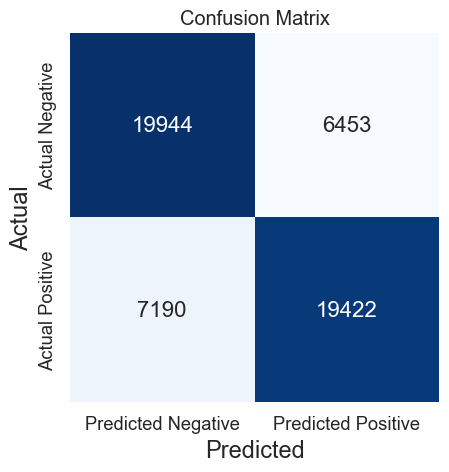

In [62]:
## confusion metrics
conf_matrix = confusion_matrix(y_test, prediction)

sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 16}, square=True,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted', fontsize=17)
plt.ylabel('Actual', fontsize=17)
plt.title('Confusion Matrix')
plt.show()


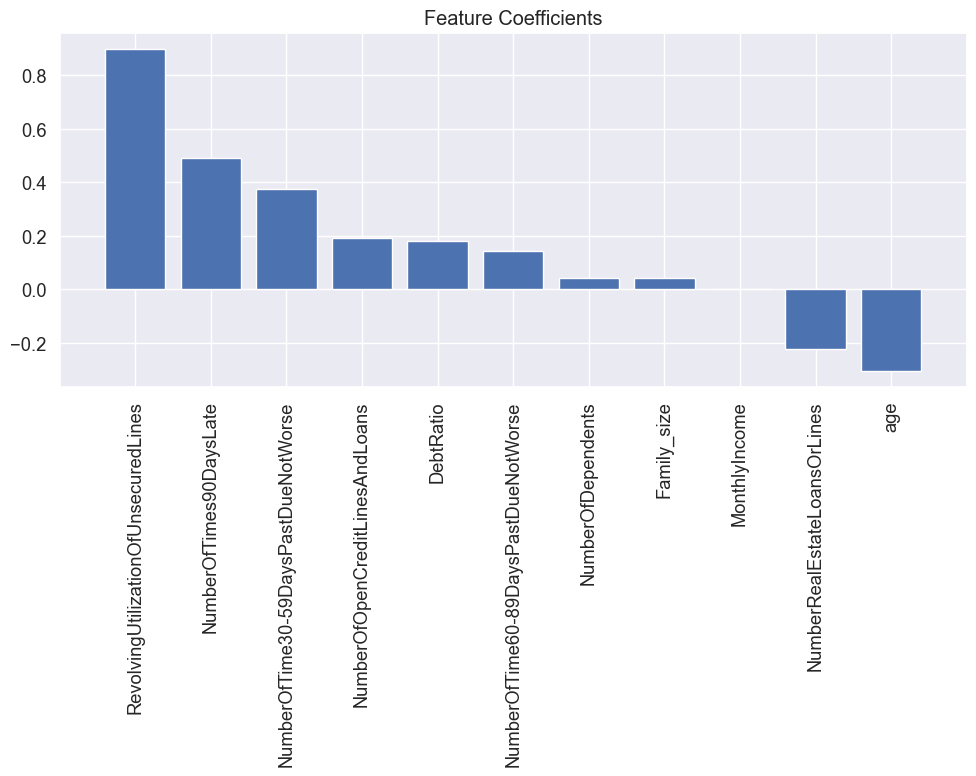

In [63]:
## feature importance
coefficients = lr.coef_[0]
feature_names = X_train.columns

# Sort coefficients in descending order
indices = coefficients.argsort()[::-1]

# Visualization
plt.figure(figsize=(10, 8))
plt.title("Feature Coefficients")
plt.bar(range(X_train.shape[1]), coefficients[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()


---
### RandomForest

In [64]:
# Training and evaluating our model's performance with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)
prediction = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
roc_auc = roc_auc_score(y_test, prediction)
f1 = f1_score(y_test, prediction)
class_report = classification_report(y_test, prediction)



print(f'The accuracy score of our model is: {accuracy *100 : 2f}%')
print(f'The ROC-AUC score of our model is: {roc_auc*100 : 2f}%')
print(f'The F1 score of our model is: {f1*100 : 2f}%')
print('')
print('')
print('')
print(class_report)

The accuracy score of our model is:  91.905148%
The ROC-AUC score of our model is:  91.908971%
The F1 score of our model is:  91.858766%



              precision    recall  f1-score   support

           0       0.91      0.93      0.92     26397
           1       0.93      0.91      0.92     26612

    accuracy                           0.92     53009
   macro avg       0.92      0.92      0.92     53009
weighted avg       0.92      0.92      0.92     53009



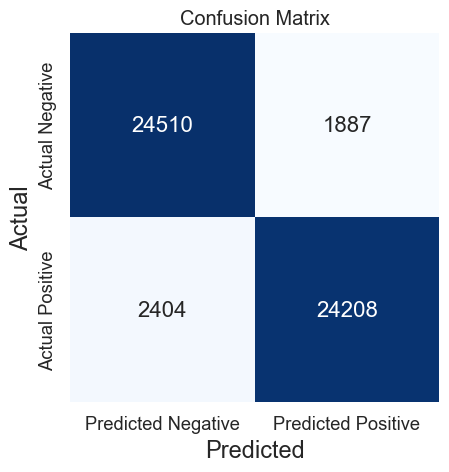

In [65]:
## confusion metrics
conf_matrix = confusion_matrix(y_test, prediction)

sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 16}, square=True,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted', fontsize=17)
plt.ylabel('Actual', fontsize=17)
plt.title('Confusion Matrix')
plt.show()


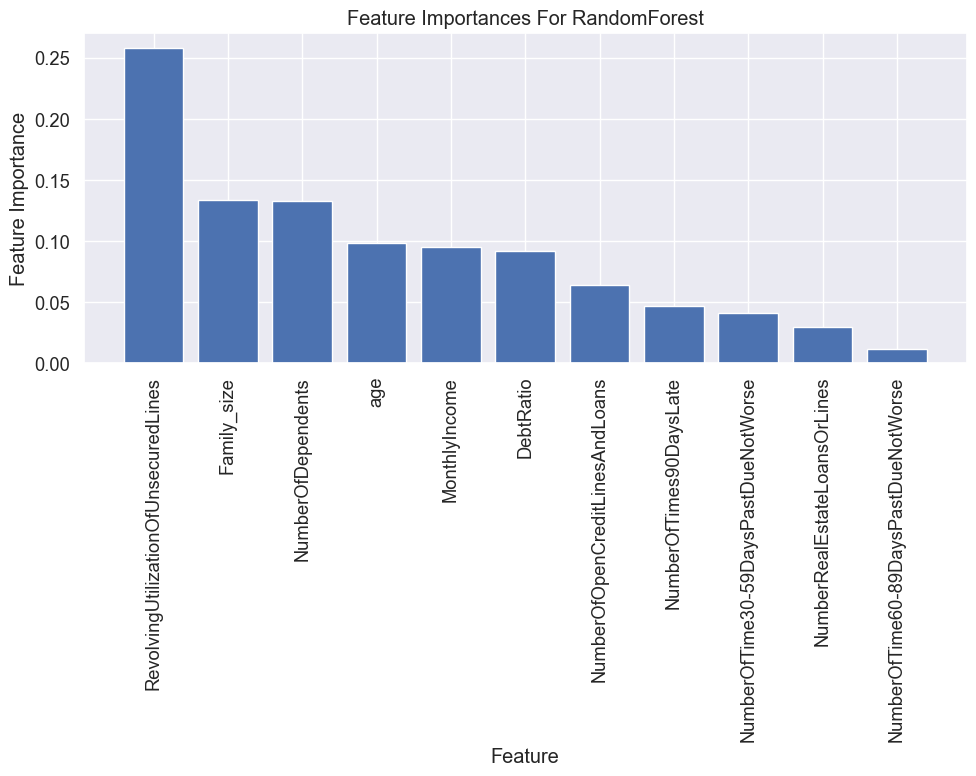

In [66]:

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Get the column names of the features
feature_names = X_train.columns

# Sort the feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_idx], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importances For RandomForest")
plt.tight_layout()
plt.show()


---
### XGBOOST

In [67]:
# Training and evaluating our model's performance with XGBClassifier
from xgboost import XGBClassifier

xgbclassifier = XGBClassifier(subsample=0.7, min_child_weight=2, max_depth=8, learning_rate=0.1577777777777778, gamma=0.5, colsample_bytree=0.9,  random_state=42)

xgbclassifier.fit(X_train, y_train)
prediction = xgbclassifier.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
roc_auc = roc_auc_score(y_test, prediction)
f1 = f1_score(y_test, prediction)
class_report = classification_report(y_test, prediction)


print(f'The accuracy score of our model is: {accuracy *100 : 2f}%')
print(f'The ROC-AUC score of our model is: {roc_auc*100 : 2f}%')
print(f'The F1 score of our model is: {f1*100 : 2f}%')
print('')
print('')
print('')
print(class_report)

The accuracy score of our model is:  88.000151%
The ROC-AUC score of our model is:  88.009510%
The F1 score of our model is:  87.761424%



              precision    recall  f1-score   support

           0       0.86      0.90      0.88     26397
           1       0.90      0.86      0.88     26612

    accuracy                           0.88     53009
   macro avg       0.88      0.88      0.88     53009
weighted avg       0.88      0.88      0.88     53009



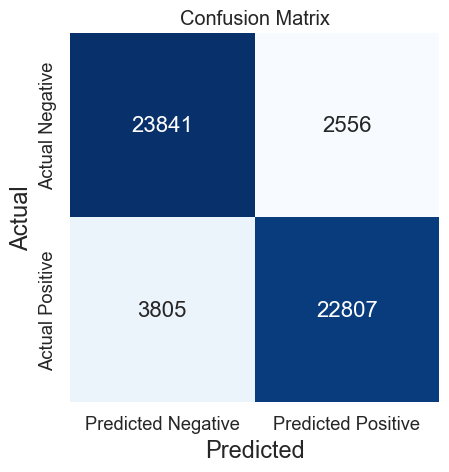

In [68]:
## confusion metrics
conf_matrix = confusion_matrix(y_test, prediction)

sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 16}, square=True,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted', fontsize=17)
plt.ylabel('Actual', fontsize=17)
plt.title('Confusion Matrix')
plt.show()


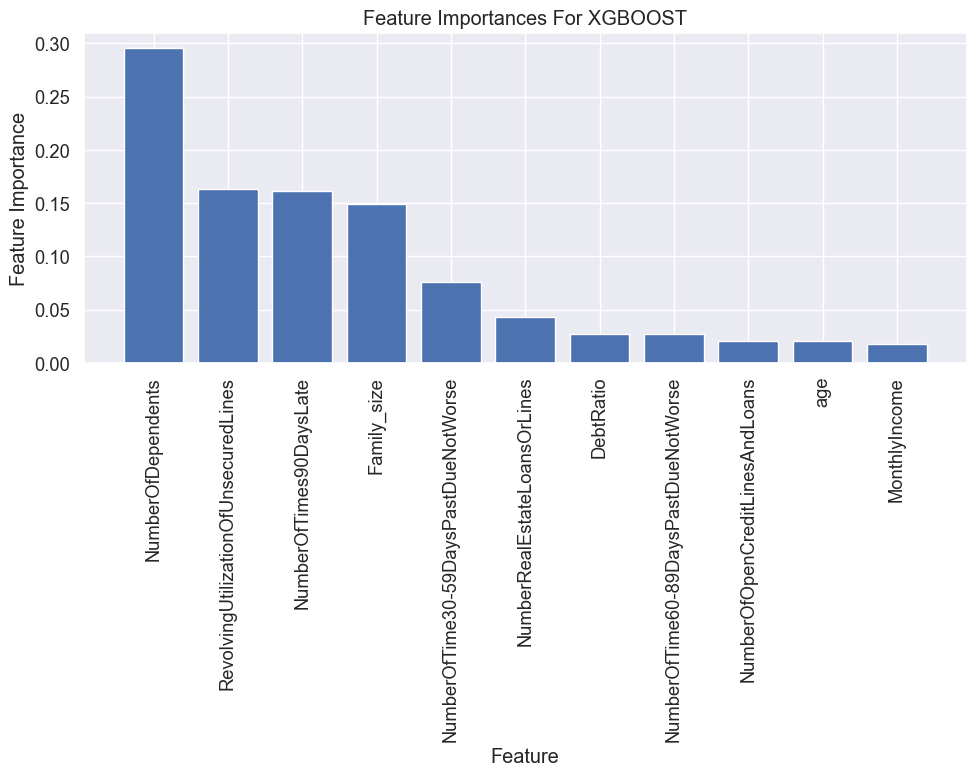

In [69]:

# Get feature importances from the trained model
feature_importances = xgbclassifier.feature_importances_

# Get the column names of the features
feature_names = X_train.columns

# Sort the feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_idx], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importances For XGBOOST")
plt.tight_layout()
plt.show()


---
### Decision Tree

In [70]:
# Training and evaluating our model's performance with DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

d_model = DecisionTreeClassifier(random_state=42)

d_model.fit(X_train, y_train)
prediction = d_model.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
roc_auc = roc_auc_score(y_test, prediction)
f1 = f1_score(y_test, prediction)
class_report = classification_report(y_test, prediction)


print(f'The accuracy score of our model is: {accuracy *100 : 2f}%')
print(f'The ROC-AUC score of our model is: {roc_auc*100 : 2f}%')
print(f'The F1 score of our model is: {f1*100 : 2f}%')
print('')
print('')
print('')
print(class_report)

The accuracy score of our model is:  87.519101%
The ROC-AUC score of our model is:  87.512009%
The F1 score of our model is:  87.776218%



              precision    recall  f1-score   support

           0       0.89      0.86      0.87     26397
           1       0.86      0.89      0.88     26612

    accuracy                           0.88     53009
   macro avg       0.88      0.88      0.88     53009
weighted avg       0.88      0.88      0.88     53009



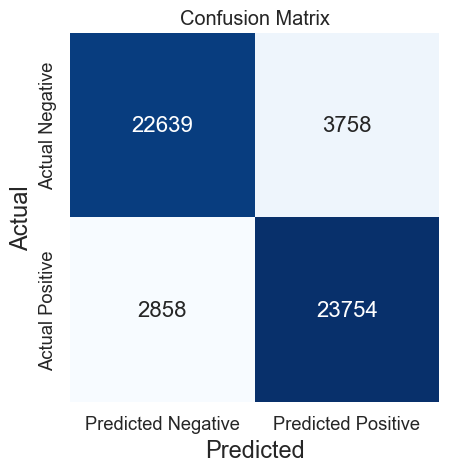

In [71]:
## confusion metrics
conf_matrix = confusion_matrix(y_test, prediction)

sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 16}, square=True,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted', fontsize=17)
plt.ylabel('Actual', fontsize=17)
plt.title('Confusion Matrix')
plt.show()


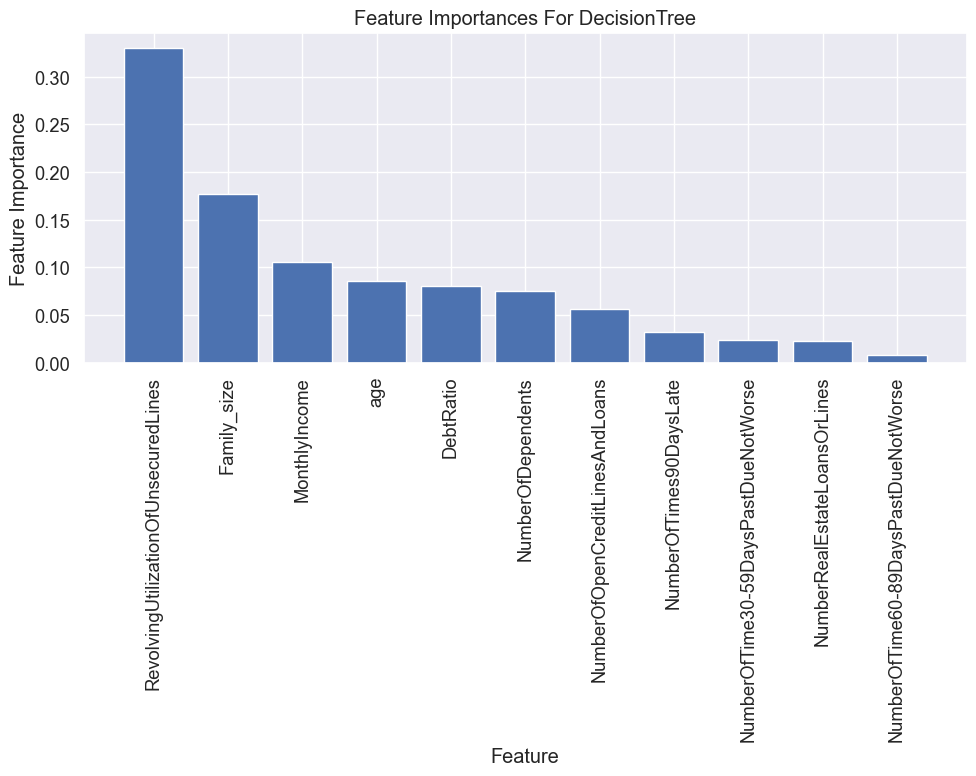

In [72]:

# Get feature importances from the trained model
feature_importances = d_model.feature_importances_

# Get the column names of the features
feature_names = X_train.columns

# Sort the feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_idx], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importances For DecisionTree")
plt.tight_layout()
plt.show()


**Creating a dataframe containing the algorithms we used to train and build our model and their respective evaluation metrics (accuracy, roc_auc score & F1 score).**

In [73]:
results_df = pd.DataFrame({
    'Algorithm' : ['Logistic Regression', 'RandomForest', 'Xgboost', 'Decision Tree'],
    'Accuracy(%)': [74.262, 91.905, 88.00, 87.519],
    'ROC-AUC_score(%)': [74.268, 91.908, 88.009, 87.512],
    'F1_score(%)': [74.006, 91.858, 87.761, 87.776]
})

In [74]:
results_df = results_df.sort_values(by=('ROC-AUC_score(%)'), ascending=False)
results_df

,Algorithm,Accuracy(%),ROC-AUC_score(%),F1_score(%)
1,RandomForest,91.905,91.908,91.858
2,Xgboost,88.000,88.009,87.761
3,Decision Tree,87.519,87.512,87.776
0,Logistic Regression,74.262,74.268,74.006


---

- Which Algorithm performed better and why do you think so?


The Random Forest algorithm emerged as the clear frontrunner in my journey to build a robust credit default prediction model. Among the various algorithms we explored, Random Forest consistently outshone its counterparts in terms of predictive accuracy, versatility, and stability.

One of the standout features of Random Forest is its ability to handle complex relationships within the data. By employing a multitude of decision trees, each trained on a random subset of features and data points, the algorithm showcased its prowess in capturing intricate patterns and nuances that are inherent in real-world financial data. This adaptability allowed Random Forest to effectively navigate the multidimensional landscape of credit default prediction, resulting in a more accurate and finely tuned model.

Moreover, the ensemble nature of the Random Forest algorithm contributed to its robustness against overfitting. By aggregating the predictions from multiple trees, the algorithm mitigated the risk of capturing noise and outliers present in the data. This safeguarding mechanism ensured that the model's performance on unseen data remained consistently high, instilling confidence in its ability to generalize effectively.

The Random Forest algorithm's performance wasn't just confined to accuracy; it also excelled in other vital metrics such as ROC-AUC and F1 score. Its well-rounded performance across these key evaluation metrics further solidified its position as the superior choice for credit default prediction.

---
What Can You Infer From Your Model Performance?
- Given your answer in #10, briefly comment on what you can infer as regards your model’s ability to generalize on unseen data. Is your model overfitting or underfitting or able to generalize well on unseen data?
- Justify your answer.


**Accuracy Score**: The accuracy score indicates how many predictions were correctly classified out of the total predictions. An accuracy score of around 91.9% suggests that the model is performing well in terms of overall correct predictions.

**ROC-AUC Score**: The ROC-AUC score evaluates the model's ability to discriminate between the positive and negative classes. An ROC-AUC score of approximately 91.91% suggests that the model is reasonably effective at distinguishing between the two classes.

**F1 Score**: The F1 score combines precision and recall and is particularly useful for imbalanced datasets. An F1 score of around 91.85% indicates that the model is achieving a good balance between precision and recall for both classes.

Considering these metrics and the closeness of the accuracy, ROC-AUC, and F1 scores, it seems that the model is generalizing well on unseen data. The similarity in performance across these metrics indicates that the model is neither significantly overfitting nor underfitting.

---
- Comment on any interesting thing you might wanna try if you were to keep improving/add more stuff to what you’ve done so far?    

I would probably have used a voting classifier to imrove my model. A Voting Classifier combines the predictions of multiple individual classifiers (e.g., Random Forest, Logistic Regression, XGBoost) to make a final prediction. It can be beneficial when different classifiers have complementary strengths and weaknesses, leading to a more robust overall prediction.

## Predictions on Test dataset

In [75]:
predictions = rf_model.predict(test_df)
#predictions = pd.DataFrame(predictions)
submission_data = pd.DataFrame({'Row_Index': test_df.index, 'Prediction': predictions})
submission_data.to_csv('predictions.csv', index=False)